## team_02
# 유방암 데이터 속성 분석
---
- 유방암 데이터의 각 속성의 특징들을 알아보자
- 히스토그램, 산점도, 상관관계도를 활용한다

In [2]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

Populating the interactive namespace from numpy and matplotlib


In [3]:
print('data =>',cancer.data.shape)
print('target =>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>',malignant.shape)
print('benign(양성) =>',benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) => (212, 30)
benign(양성) => (357, 30)


- SVC 으로 분류해 보자
- 속성 30개를 모두 사용하고 정규화를 적용한다

In [19]:
scores = []

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

    X_mean = X_train.mean(axis=0)
    X_std = X_train.std(axis=0)

    X_train_scaled = (X_train-X_mean)/X_std
    X_test_scaled = (X_test-X_mean)/X_std

    model=SVC(C=1,gamma=0.1)
    model.fit(X_train_scaled,y_train)

    pred_y = model.predict(X_test_scaled)
    score = model.score(X_test_scaled,y_test)
    scores.append(score)

print('scores =', scores)

scores = [0.965034965034965, 0.972027972027972, 0.972027972027972, 0.9440559440559441, 0.9440559440559441, 0.965034965034965, 0.972027972027972, 0.9230769230769231, 0.951048951048951, 0.9370629370629371]


- 각 속성들의 히스토그램을 그려서, 각 속성들이 악성과 양성을 어떻게 구분하고 있는지를 확인한다

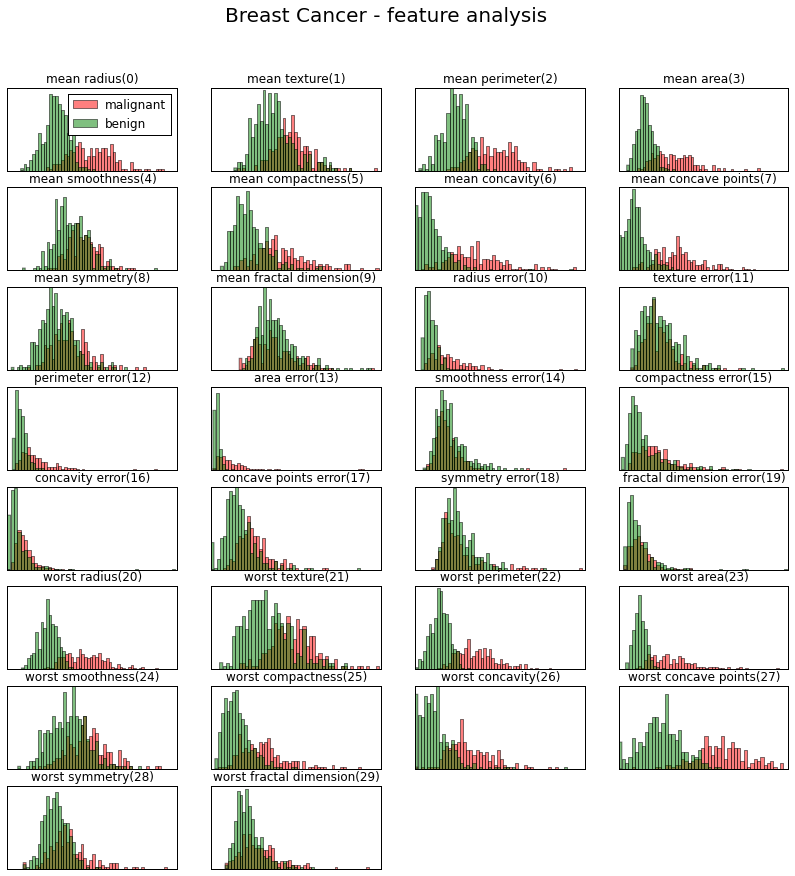

In [29]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
    _,bins=np.histogram(cancer.data[:,col],bins=50)
    plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
    plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
    if col==0: plt.legend()

- 속성이 너무 많아 모든 경우의 산점도를 그려보기는 어렵다 (총 30*28/2 = 420개의 산점도)
- 첫번째 속성인 "mean radius" 와 다른 속성들 간의 산점도를 그려보자

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


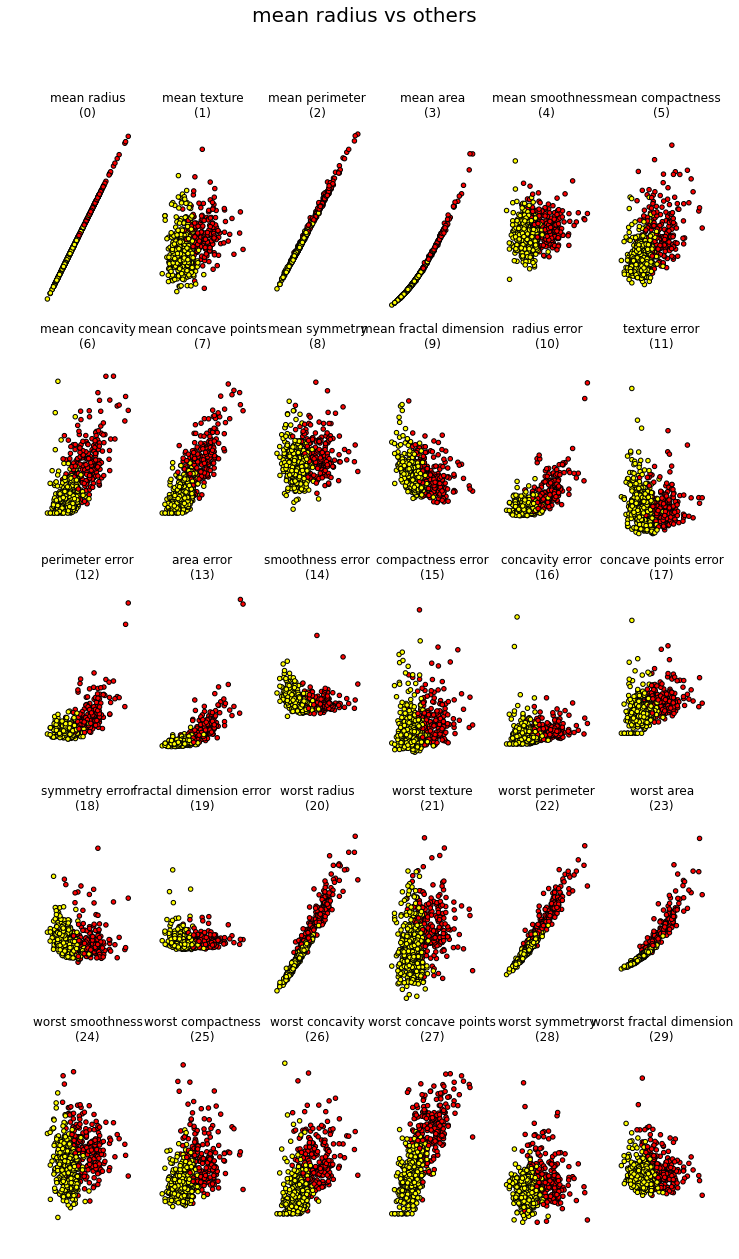

In [8]:
fig,axes = plt.subplots(5,6,figsize=[12,20])
fig.suptitle('mean radius vs others', fontsize=20)

for i in range(30):
    ax=axes.ravel()[i]
    ax.scatter(cancer.data[:,0],cancer.data[:,i], c=cancer.target, cmap='autumn')
    ax.set_title(cancer.feature_names[i]+('\n(%d)' % i))
    ax.set_axis_off()

- 위 산점도에서, 하나하나를 확대해 보자

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


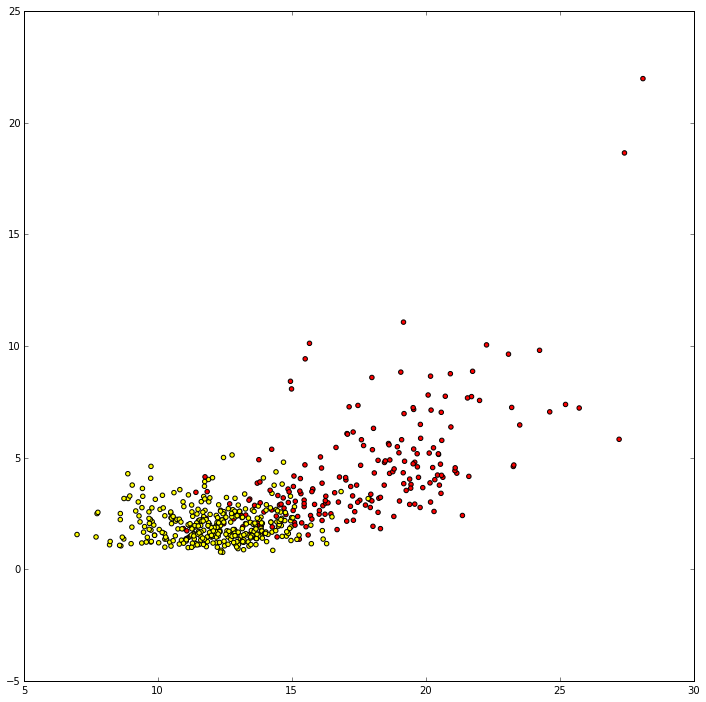

In [30]:
plt.figure(figsize=[12,12])
plt.scatter(cancer.data[:,0],cancer.data[:,12], c=cancer.target, cmap='autumn')

- 각 속성들간의 상관관계를 상관계수와 히트맵을 통해 알아보자

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


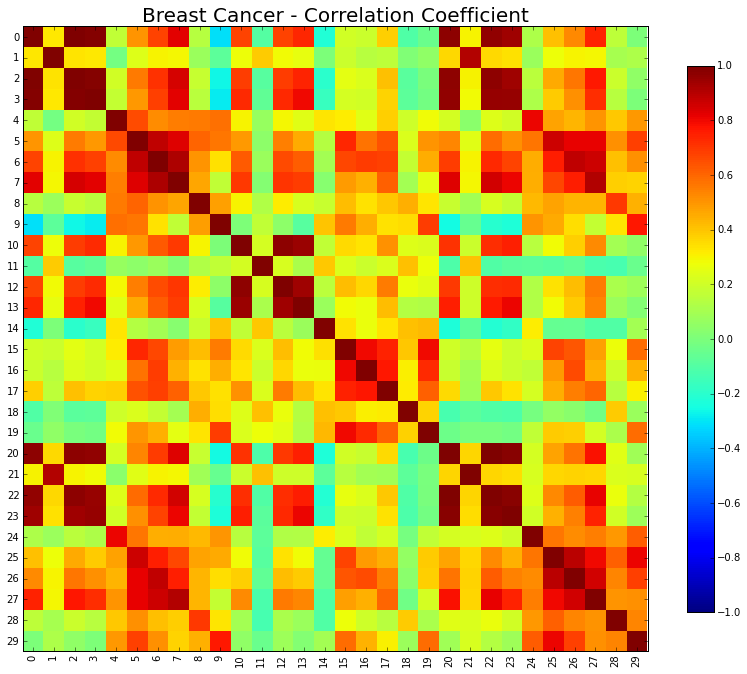

In [16]:
mat=np.corrcoef(cancer.data.T)

fig=plt.figure(figsize=[14,14])
plt.title('Breast Cancer - Correlation Coefficient',fontsize=20)
plt.imshow(mat, interpolation='none', vmin=-1, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(30),rotation=90)
plt.yticks(range(30))
print('')

- 상관관계도를 보고, 비슷한 속성들 끼리 묶어서 다시 산관관계도를 그려보자

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


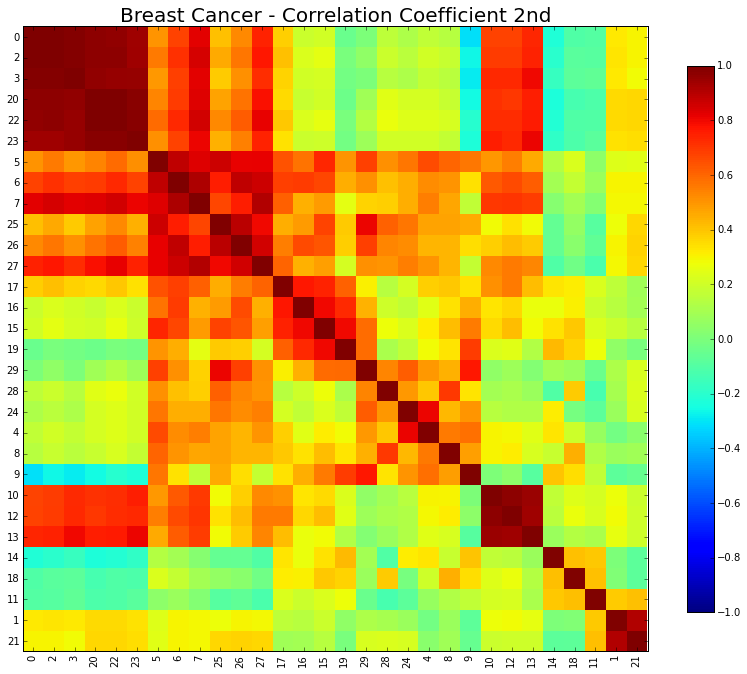

In [26]:
sorter = [0,2,3,20,22,23,    5,6,7,25,26,27,   17,16,15,19,   29,28,24,
          4,8,9,    10,12,13,    14,18,11,    1,21]

data2 = cancer.data[:,sorter]
features2 = cancer.feature_names[sorter]

mat=np.corrcoef(data2.T)

fig=plt.figure(figsize=[14,14])
plt.title('Breast Cancer - Correlation Coefficient 2nd',fontsize=20)
plt.imshow(mat, interpolation='none', vmin=-1, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(30),sorter,rotation=90)
plt.yticks(range(30),sorter)
print('')